# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create URL, blank city data table & reset counters for the loop
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
record_counter = 1
set_counter = 1

print("Beginning Data Retrieval\n----------------------------")

# Create the loop
for x, city in enumerate(cities):
    
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    
    # Get an API request for each city in the cities list
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        record_counter = record_counter + 1
    except:
        print("City not found. Skipping...")
        record_counter = record_counter + 1
        pass
    
        
print("----------------------------\nData Retrieval Complete\n----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | hokitika
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kalangala
Processing Record 5 of Set 1 | plettenberg bay
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | locri
Processing Record 13 of Set 1 | tilichiki
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | shieli
Processing Record 16 of Set 1 | chapada dos guimaraes
Processing Record 17 of Set 1 | scarborough
Processing Record 18 of Set 1 | merzifon
Processing Record 19 of Set 1 | bujak
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | tuktoyak

Processing Record 187 of Set 1 | qasigiannguit
Processing Record 188 of Set 1 | santa cruz
Processing Record 189 of Set 1 | sao filipe
Processing Record 190 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 191 of Set 1 | sanand
Processing Record 192 of Set 1 | winton
Processing Record 193 of Set 1 | bethel
Processing Record 194 of Set 1 | chaumont
Processing Record 195 of Set 1 | xinmin
Processing Record 196 of Set 1 | severo-kurilsk
Processing Record 197 of Set 1 | lobito
Processing Record 198 of Set 1 | anzio
Processing Record 199 of Set 1 | khatanga
Processing Record 200 of Set 1 | port elizabeth
Processing Record 201 of Set 1 | grindavik
Processing Record 202 of Set 1 | tibiri
Processing Record 203 of Set 1 | athabasca
Processing Record 204 of Set 1 | iquitos
Processing Record 205 of Set 1 | saint-pierre
Processing Record 206 of Set 1 | lebu
Processing Record 207 of Set 1 | isla mujeres
Processing Record 208 of Set 1 | longyearbyen
Processing Record 209 of Set 1

Processing Record 375 of Set 1 | natal
Processing Record 376 of Set 1 | roma
Processing Record 377 of Set 1 | flateby
Processing Record 378 of Set 1 | saint-louis
Processing Record 379 of Set 1 | nizwa
Processing Record 380 of Set 1 | salalah
Processing Record 381 of Set 1 | zhaoyuan
Processing Record 382 of Set 1 | verkhoyansk
Processing Record 383 of Set 1 | crestview
Processing Record 384 of Set 1 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 385 of Set 1 | kenai
Processing Record 386 of Set 1 | merauke
Processing Record 387 of Set 1 | burton
Processing Record 388 of Set 1 | santa catalina
Processing Record 389 of Set 1 | lagunillas
Processing Record 390 of Set 1 | obo
Processing Record 391 of Set 1 | tambo
Processing Record 392 of Set 1 | leshukonskoye
Processing Record 393 of Set 1 | ballina
Processing Record 394 of Set 1 | jacqueville
Processing Record 395 of Set 1 | gazli
Processing Record 396 of Set 1 | chenzhou
Processing Record 397 of Set 1 | okhotsk
Proc

Processing Record 557 of Set 1 | arlit
Processing Record 558 of Set 1 | novoilinsk
Processing Record 559 of Set 1 | oistins
Processing Record 560 of Set 1 | los algarrobos
Processing Record 561 of Set 1 | port lincoln
Processing Record 562 of Set 1 | discovery bay
Processing Record 563 of Set 1 | birjand
Processing Record 564 of Set 1 | palmer
Processing Record 565 of Set 1 | yadgir
Processing Record 566 of Set 1 | tomatlan
Processing Record 567 of Set 1 | shangrao
Processing Record 568 of Set 1 | tondano
Processing Record 569 of Set 1 | odweyne
Processing Record 570 of Set 1 | saint-medard-en-jalles
Processing Record 571 of Set 1 | ola
Processing Record 572 of Set 1 | salinas
Processing Record 573 of Set 1 | sinkat
City not found. Skipping...
Processing Record 574 of Set 1 | coquimbo
Processing Record 575 of Set 1 | van
Processing Record 576 of Set 1 | visnes
Processing Record 577 of Set 1 | tautira
Processing Record 578 of Set 1 | batagay-alyta
Processing Record 579 of Set 1 | ararip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df = pd.DataFrame(city_data)
city_df.to_csv("output_data/city_data.csv", index = False)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,53.46,60,10,9.22,AU,1638724200
1,hokitika,-42.7167,170.9667,54.63,89,97,7.02,NZ,1638724201
2,albany,42.6001,-73.9662,42.46,56,100,1.01,US,1638724202
3,kalangala,-0.3089,32.2250,74.61,66,97,7.36,UG,1638724203
4,plettenberg bay,-34.0527,23.3716,65.93,90,61,2.17,ZA,1638724204


In [5]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.330033,15.446035,54.034257,71.217391,60.806159,8.422210,1.638724e+09
std,33.353114,91.856745,29.945669,20.660593,36.398088,7.009685,5.676388e+01
min,-54.800000,-179.166700,-48.300000,7.000000,0.000000,0.000000,1.638724e+09
25%,-8.042925,-64.475400,35.395000,60.000000,29.000000,3.927500,1.638724e+09
50%,21.768200,19.100600,63.885000,74.000000,74.000000,6.565000,1.638724e+09
75%,46.576325,98.354350,78.297500,87.000000,96.250000,11.250000,1.638724e+09
max,78.218600,179.316700,98.690000,100.000000,100.000000,54.090000,1.638724e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df = city_df[city_df.Humidity <= 100]
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.330033,15.446035,54.034257,71.217391,60.806159,8.422210,1.638724e+09
std,33.353114,91.856745,29.945669,20.660593,36.398088,7.009685,5.676388e+01
min,-54.800000,-179.166700,-48.300000,7.000000,0.000000,0.000000,1.638724e+09
25%,-8.042925,-64.475400,35.395000,60.000000,29.000000,3.927500,1.638724e+09
50%,21.768200,19.100600,63.885000,74.000000,74.000000,6.565000,1.638724e+09
75%,46.576325,98.354350,78.297500,87.000000,96.250000,11.250000,1.638724e+09
max,78.218600,179.316700,98.690000,100.000000,100.000000,54.090000,1.638724e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

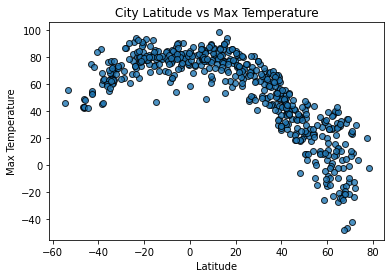

In [7]:
x_axis = city_df["Lat"]
y_axis = city_df["Max Temp"]

plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig("output_data/fig01.png")
plt.show()

## Latitude vs. Humidity Plot

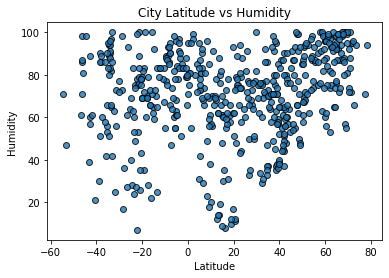

In [8]:
x_axis = city_df["Lat"]
y_axis = city_df["Humidity"]

plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("output_data/fig02.png")
plt.show()

## Latitude vs. Cloudiness Plot

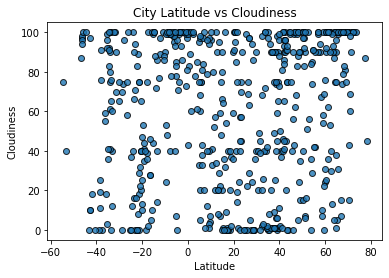

In [9]:
x_axis = city_df["Lat"]
y_axis = city_df["Cloudiness"]

plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("output_data/fig03.png")
plt.show()

## Latitude vs. Wind Speed Plot

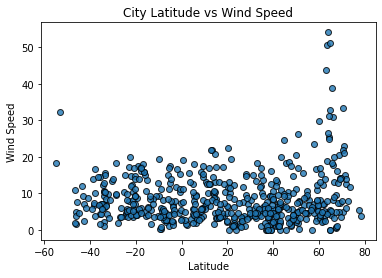

In [10]:
x_axis = city_df["Lat"]
y_axis = city_df["Wind Speed"]

plt.scatter(x_axis, y_axis, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("output_data/fig04.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7686210940746907


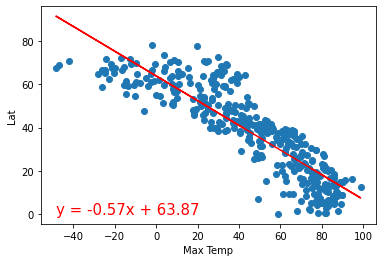

In [11]:
# Create a dataframe for the northern hemisphere
north_df = city_df[city_df.Lat > 0]

# Create x and y values
x_values = north_df["Max Temp"]
y_values = north_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Max Temp")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig05.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3748353127249676


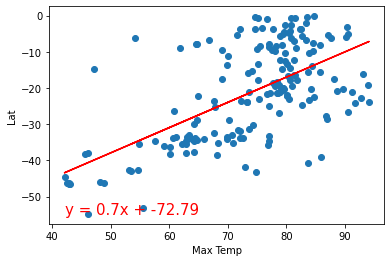

In [12]:
# Create a dataframe for the northern hemisphere
south_df = city_df[city_df.Lat < 0]

# Create x and y values
x_values = south_df["Max Temp"]
y_values = south_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Max Temp")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig06.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.1618142050106015


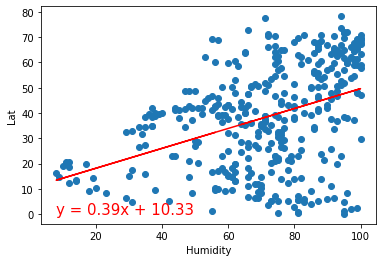

In [13]:
# Create x and y values
x_values = north_df["Humidity"]
y_values = north_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Humidity")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig07.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.016681960644587046


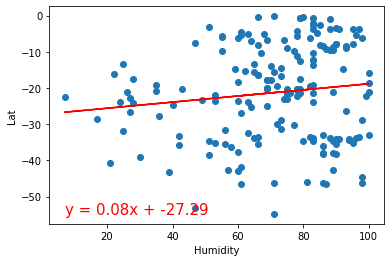

In [14]:
# Create x and y values
x_values = south_df["Humidity"]
y_values = south_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Humidity")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig08.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.05606045721817629


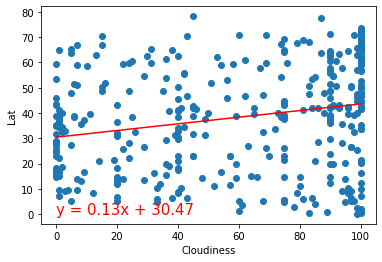

In [15]:
# Create x and y values
x_values = north_df["Cloudiness"]
y_values = north_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Cloudiness")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig09.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.055880944995634355


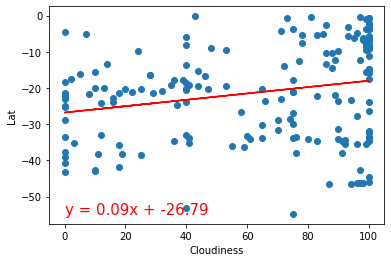

In [16]:
# Create x and y values
x_values = south_df["Cloudiness"]
y_values = south_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Cloudiness")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03703741079663473


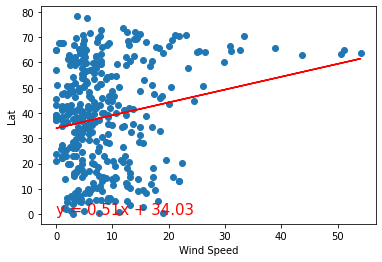

In [17]:
# Create x and y values
x_values = north_df["Wind Speed"]
y_values = north_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Wind Speed")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.01344217249268363


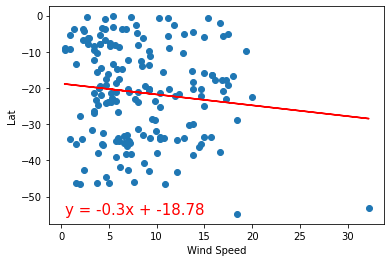

In [18]:
x_values = south_df["Wind Speed"]
y_values = south_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Wind Speed")
plt.ylabel("Lat")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show and save plot
plt.savefig("output_data/fig12.png")
plt.show()